### Comenzamos con la importacion de las librerias necesarias para este proyecto

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A continuacion vamos a leer el archivo .xlsx que va a estar acotado, es decir, se removieron hojas de este libro dado que no eran relevantes para el analisis. Ademas habia otras hojas que contenian la misma informacion.

In [316]:
df_internet = pd.ExcelFile('Data/Internet_acotado.xlsx')
sheet = df_internet.sheet_names

### Las siguientes hojas son las que vamos a utilizar para el analisis

In [317]:
sheet

['Velocidad % por prov',
 'Accesos Por Tecnolog√≠a',
 'Penetracion-totales',
 'Penetraci√≥n-poblacion',
 'Penetracion-hogares',
 'Accesos por velocidad',
 'Ingresos ']

----------

### Analizando los datos de las hojas (sheet)

* Valores nulos
* Valores ceros
* Valores duplicados
* Outliers

### Comenzamos con la hoja Ingresos

Contiene los Ingresos generados por los servicios de internet en miles de
pesos.

In [318]:
# Cargamos la hoja del archivo en un Data Frame
df_ingresos = df_internet.parse('Ingresos ')
df_ingresos.head()

A√±o  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          1               2.804191e+08   Ene-Mar 2024
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3               1.331066e+08  Jul-Sept 2023
3  2023          2               1.180603e+08   Jun-Mar 2023
4  2023          1               1.041350e+08   Ene-Mar 2023

In [386]:
# Viendo valores nulos
df_ingresos.isna().sum()

A√±o                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [387]:
# Viendo valores ceros
(df_ingresos == 0).sum()

A√±o                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [388]:
# Viendo valores duplicados
df_ingresos.duplicated().sum()


np.int64(0)

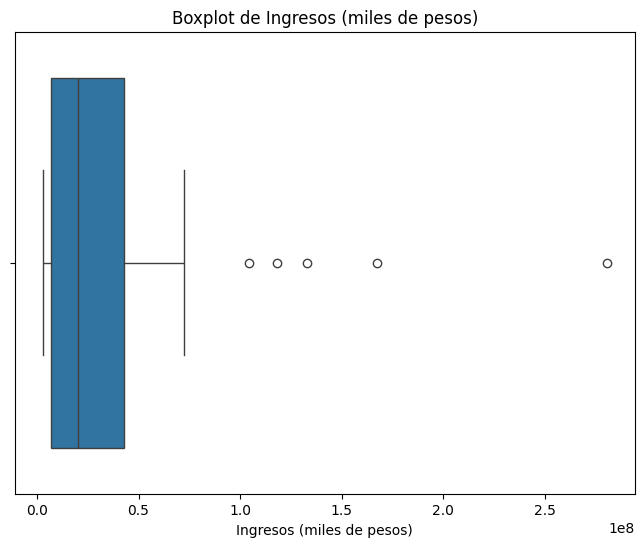

In [322]:
# Boxplot 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_ingresos['Ingresos (miles de pesos)'])
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.show()

In [323]:
# Grafica separada por trimestre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribuci√≥n de Ingresos por Trimestre')
plt.show()

#### El crecimiento de los ingresos fue muy rapido los ultimos a√±os, es por eso que se puede ver sesgado mas a la derecha, lo que explica los valores atipicos fuera de los bigotes del grafico Boxplot

----

## Analisis de la hoja de accesos por velocidad

In [389]:
# Guardamos la hoja en un Data Frame
df_accesos_por_velocidad = df_internet.parse('Accesos por velocidad')
df_accesos_por_velocidad.head()

A√±o  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1               5957.0  1374283.0       0.0  1504711.0  
2               1822.0    62294.0      70.0    74933.0  
3               5718.0   116624.0    3816.0   155543.0  
4              20261.0    33844.0   16640.0   170676.0

In [390]:
# Viendo valores nulos
df_accesos_por_velocidad.isna().sum()

A√±o                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [391]:
# Viendo valores ceros
(df_ingresos == 0).sum()

A√±o                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [392]:
# Viendo valores duplicados
df_ingresos.duplicated().sum()

np.int64(0)

In [328]:
df_accesos_por_velocidad.columns

Index(['A√±o', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

### Outliers vamos a buscar a partir de los 6 Megas de velocidad

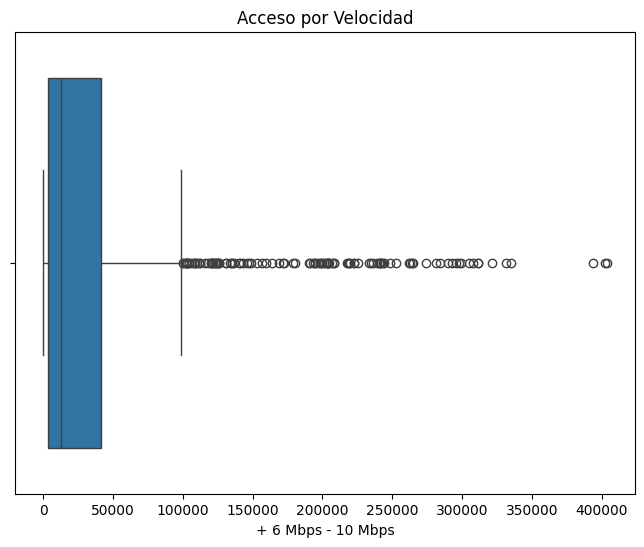

In [329]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 6 Mbps - 10 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

In [393]:
# Histograma de la columna '+ 6 Mbps - 10 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 6 Mbps - 10 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (6 Mbps - 10 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()


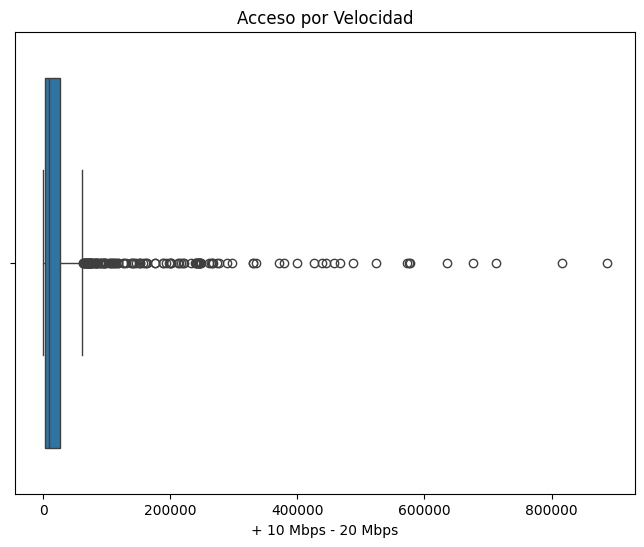

In [330]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

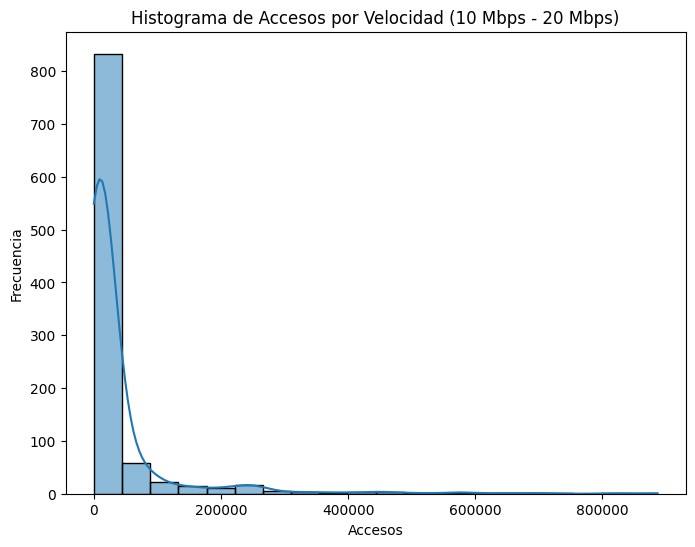

In [394]:
# Histograma de la columna '+ 10 Mbps - 20 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (10 Mbps - 20 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()


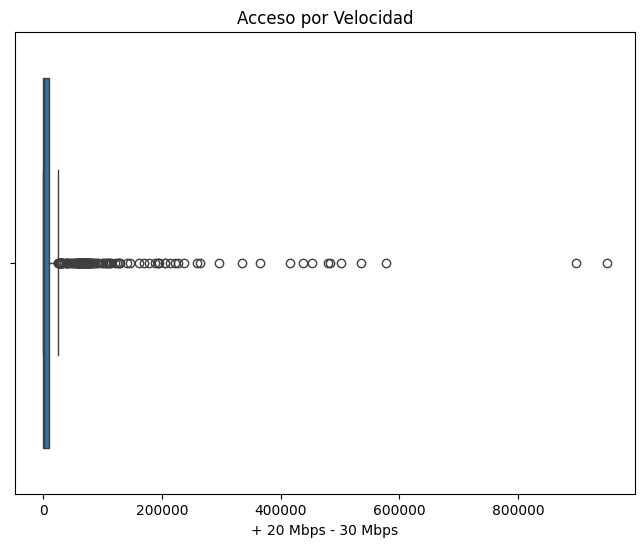

In [331]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

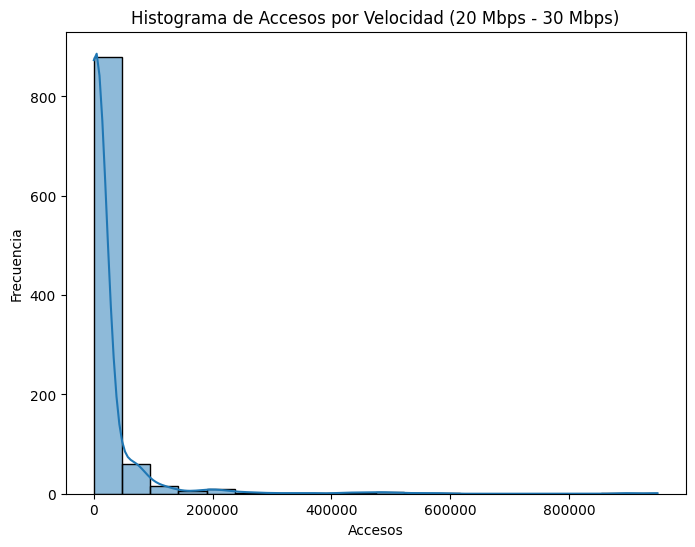

In [395]:
# Histograma de la columna '+ 20 Mbps - 30 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (20 Mbps - 30 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()


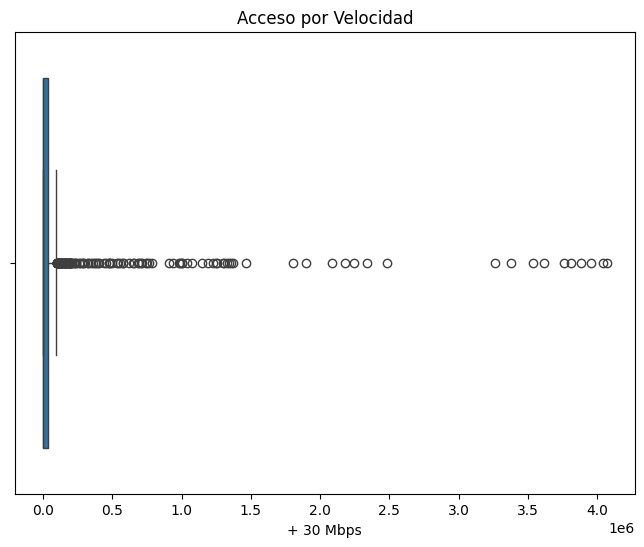

In [332]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 30 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()


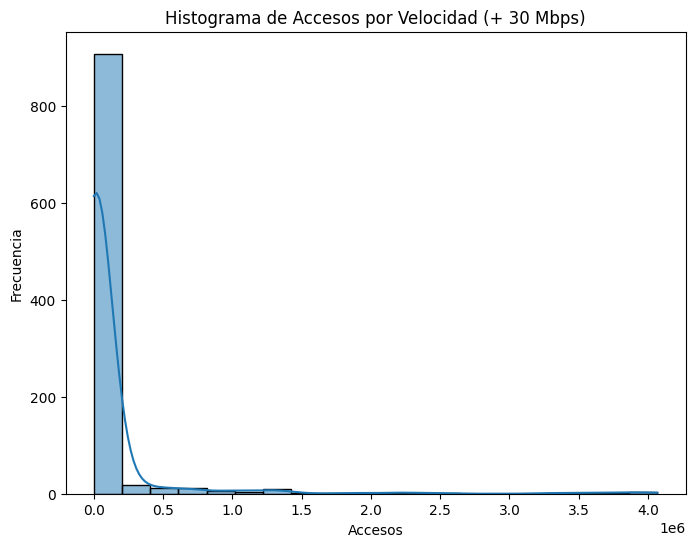

In [396]:
# Histograma de la columna '+ 30 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 30 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (+ 30 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

#### Acompa√±amos cada Boxplot con un histograma. Tenemos muchos valores atipicos, pero esto se debe a la distribucion asimetrica que existe con cada velocidad de conexion. Tambien por crecimientos irregulares que varian en cada provincia a traves del tiempo.

---

### Analisis de la hoja Penetracion-hogares

In [398]:
# Pasamos la hoja a un Data Frame
df_penetracion_hogares = df_internet.parse('Penetracion-hogares')
df_penetracion_hogares.head()

A√±o  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          1     Buenos Aires                         81.10
1  2024          1  Capital Federal                        119.53
2  2024          1        Catamarca                         68.82
3  2024          1            Chaco                         46.70
4  2024          1           Chubut                         84.89

In [399]:
# Valores nulos
df_penetracion_hogares.isna().sum()

A√±o                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [400]:
# Ceros 
(df_penetracion_hogares == 0).sum()

A√±o                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [401]:
# Valores duplicados
df_penetracion_hogares.duplicated().sum()

np.int64(0)

In [402]:
df_penetracion_hogares.columns

Index(['A√±o', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

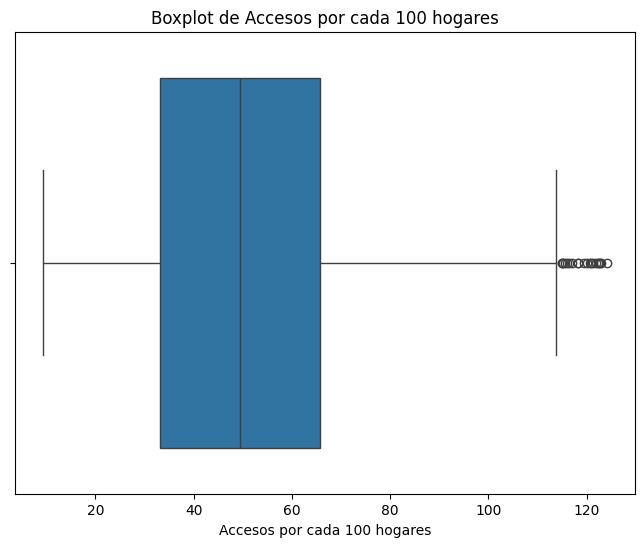

In [403]:
# Boxplot de la columna 'Accesos por cada 100 hogares'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.title('Boxplot de Accesos por cada 100 hogares')
plt.show()

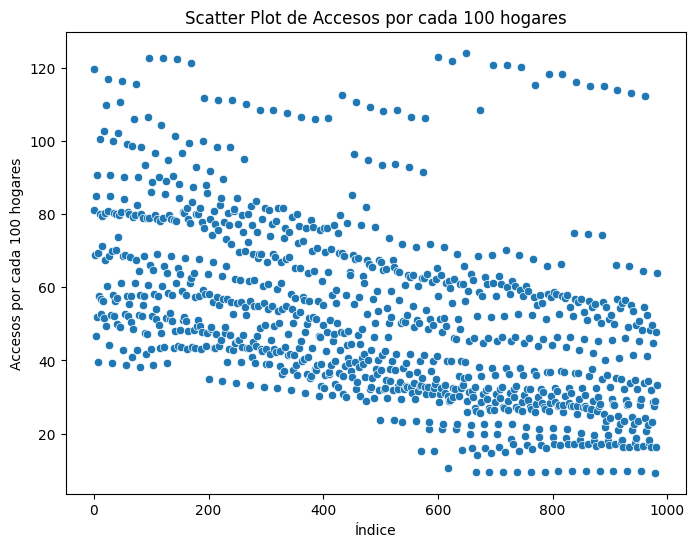

In [404]:
# Scatter Acceso por cada 100 hogares
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_penetracion_hogares.index, y=df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.title('Scatter Plot de Accesos por cada 100 hogares')
plt.xlabel('√çndice')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()


#### Acompa√±amos este ultimo grafico tambien para observar el grado de dispersion de los accesos por cada 100 hogares

---

### Analisis de la hoja Penetraci√≥n-poblacion

In [405]:
# Guardamos la hoja en un Data Frame
df_penetracion_poblacion = df_internet.parse('Penetraci√≥n-poblacion')
df_penetracion_poblacion.head()

A√±o  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          1     Buenos Aires                     27.80
1  2024          1  Capital Federal                     48.78
2  2024          1        Catamarca                     17.50
3  2024          1            Chaco                     12.48
4  2024          1           Chubut                     26.02

In [406]:
# Valores nulos
df_penetracion_poblacion.isna().sum()

A√±o                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [407]:
# Ceros
(df_penetracion_poblacion == 0).sum()

A√±o                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [408]:
# Valores duplicados
df_penetracion_poblacion.duplicated().sum()

np.int64(0)

In [409]:
df_penetracion_poblacion.columns

Index(['A√±o', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')

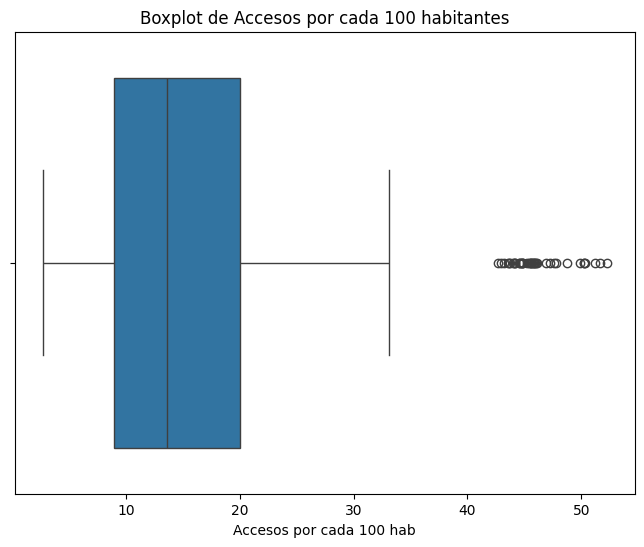

In [410]:
# Boxplot de la columna 'Accesos por cada 100 hab'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_penetracion_poblacion['Accesos por cada 100 hab'])
plt.title('Boxplot de Accesos por cada 100 habitantes')
plt.show()


---

### Analisis de la hoja Penetracion-totales

In [411]:
# Pasamos la hoja a un DataFrame
df_penetracion_totales = df_internet.parse('Penetracion-totales')
df_penetracion_totales

A√±o  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0   2024          1                     78.890000                 24.790000   
1   2023          4                     78.560000                 24.660000   
2   2023          3                     77.840000                 24.410000   
3   2023          2                     77.020000                 24.140000   
4   2023          1                     77.200000                 24.170000   
5   2022          4                     77.210000                 24.150000   
6   2022          3                     76.640000                 23.950000   
7   2022          2                     75.965424                 23.720442   
8   2022          1                     73.878803                 23.049171   
9   2021          4                     73.176397                 22.810702   
10  2021          3                     70.578853                 21.982550   
11  2021          2                     69.240183                 21.547939   
12  2021          1                     67.945876                 21.127832   
13  2020          4                     67.622339                 21.010192   
14  2020          3                     66.310000                 20.590000   
15  2020          2                     64.210003                 19.918403   
16  2020          1                     62.856361                 19.483265   
17  2019          4                     62.919912                 19.487900   
18  2019          3                     65.787985                 20.360661   
19  2019          2                     64.530000                 19.960000   
20  2019          1                     62.479166                 19.307907   
21  2018          4                     61.415807                 18.970000   
22  2018          3                     60.690000                 18.730000   
23  2018          2                     59.162069                 18.240000   
24  2018          1                     58.820000                 18.120000   
25  2017          4                     57.782351                 17.792977   
26  2017          3                     56.899221                 17.509032   
27  2017          2                     54.901191                 16.882937   
28  2017          1                     54.162116                 16.644565   
29  2016          4                     53.936019                 16.564000   
30  2016          3                     53.734186                 16.504676   
31  2016          2                     53.342201                 16.371351   
32  2016          1                     51.845452                 15.901802   
33  2015          4                     52.630888                 16.122697   
34  2015          3                     52.459106                 16.050289   
35  2015          2                     51.760266                 15.817234   
36  2015          1                     51.364586                 15.677234   
37  2014          4                     50.499788                 15.394677   
38  2014          3                     50.672368                 15.428769   
39  2014          2                     49.861428                 15.163908   
40  2014          1                     49.545821                 15.050104   

          Periodo  
0    Ene-Mar 2024  
1    Oct-Dic 2023  
2   Jul-Sept 2023  
3    Abr-Jun 2023  
4    Ene-Mar 2023  
5    Oct-Dic 2022  
6   Jul-Sept 2022  
7    Abr-Jun 2022  
8    Ene-Mar 2022  
9    Oct-Dic 2021  
10  Jul-Sept 2021  
11   Abr-Jun 2021  
12   Ene-Mar 2021  
13   Oct-Dic 2020  
14  Jul-Sept 2020  
15   Abr-Jun 2020  
16   Ene-Mar 2020  
17   Oct-Dic 2019  
18  Jul-Sept 2019  
19   Abr-Jun 2019  
20   Ene-Mar 2019  
21   Oct-Dic 2018  
22  Jul-Sept 2018  
23   Abr-Jun 2018  
24   Ene-Mar 2018  
25   Oct-Dic 2017  
26  Jul-Sept 2017  
27   Abr-Jun 2017  
28   Ene-Mar 2017  
29   Oct-Dic 2016  
30  Jul-Sept 2016  
31   Abr-Jun 2016  
32   Ene-Mar 2016  
33   

In [412]:
# Viendo valores nulos
df_penetracion_totales.isna().sum()

A√±o                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [413]:
# Viendo ceros
(df_penetracion_totales == 0).sum()

A√±o                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [414]:
# Viendo duplicados
df_penetracion_totales.duplicated().sum()

np.int64(0)

In [415]:
df_penetracion_totales.columns

Index(['A√±o', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')

#### Graficos para evaluar algunas relaciones

1. Evoluci√≥n de la penetraci√≥n de accesos por cada 100 hogares y cada 100 habitantes a lo largo de los a√±os.

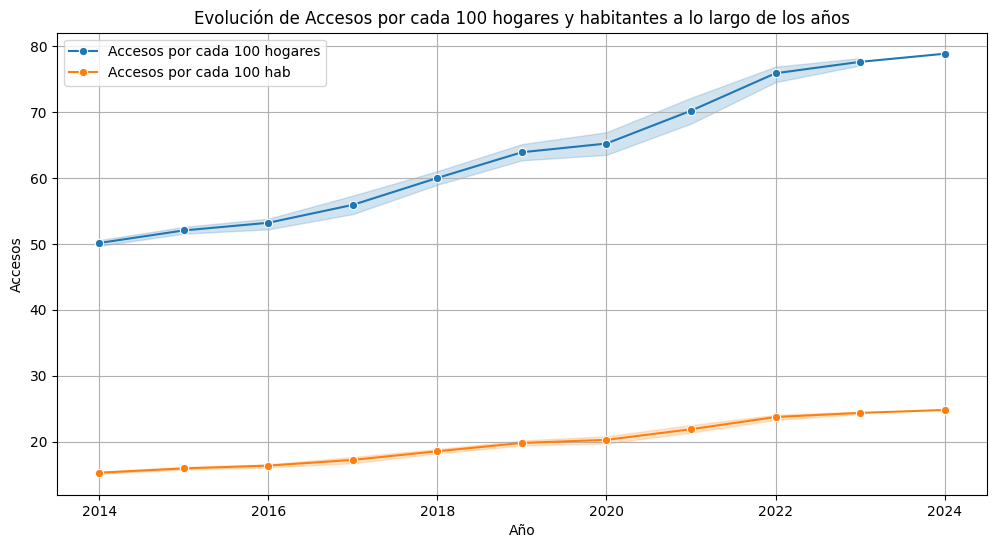

In [416]:
# Filtrar los datos por a√±o
plt.figure(figsize=(12, 6))

# Gr√°fico de la evoluci√≥n de los accesos por cada 100 hogares
sns.lineplot(x='A√±o', y='Accesos por cada 100 hogares', data=df_penetracion_totales, marker='o', label='Accesos por cada 100 hogares')

# Gr√°fico de la evoluci√≥n de los accesos por cada 100 habitantes
sns.lineplot(x='A√±o', y='Accesos por cada 100 hab', data=df_penetracion_totales, marker='o', label='Accesos por cada 100 hab')

# Configuraci√≥n de etiquetas y t√≠tulo
plt.title('Evoluci√≥n de Accesos por cada 100 hogares y habitantes a lo largo de los a√±os')
plt.xlabel('A√±o')
plt.ylabel('Accesos')
plt.legend()
plt.grid(True)
plt.show()


2. Comparaci√≥n de la penetraci√≥n por trimestre. Gr√°fico de barras apiladas para visualizar c√≥mo var√≠a la penetraci√≥n de acceso a internet por cada trimestre en un a√±o determinado.

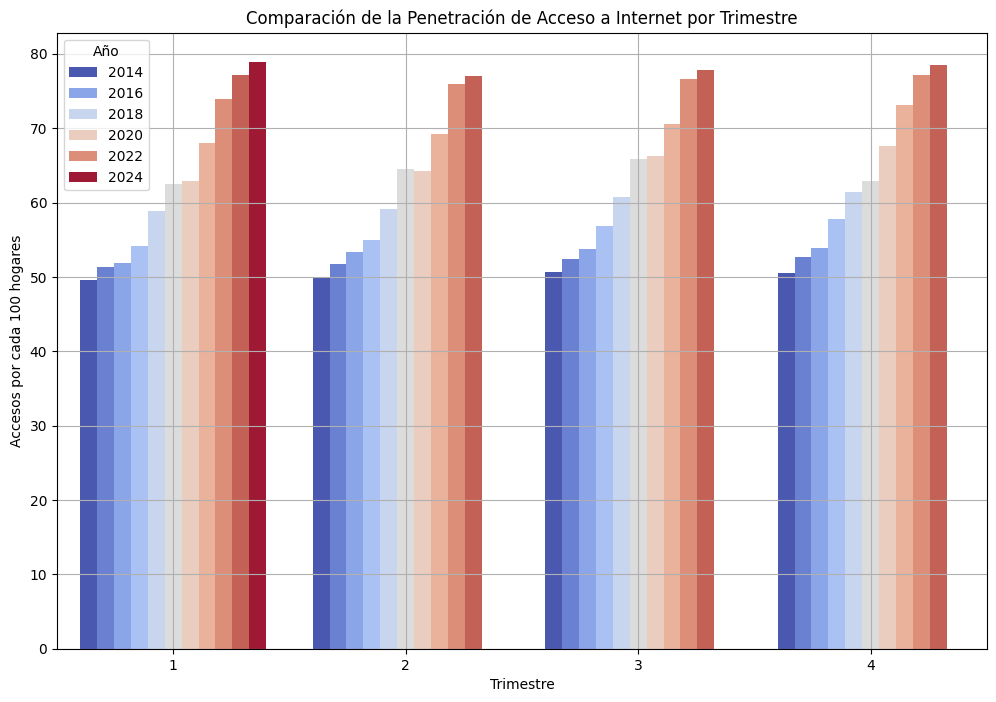

In [417]:
# Filtrar los datos por a√±o y trimestre
plt.figure(figsize=(12, 8))
sns.barplot(x='Trimestre', y='Accesos por cada 100 hogares', data=df_penetracion_totales, hue='A√±o', palette='coolwarm')

# Configuraci√≥n de etiquetas y t√≠tulo
plt.title('Comparaci√≥n de la Penetraci√≥n de Acceso a Internet por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='A√±o')
plt.grid(True)
plt.show()


3. Comparaci√≥n entre acceso por hogares y habitantes en un mismo gr√°fico para ver la relaci√≥n entre los accesos por hogares y habitantes:

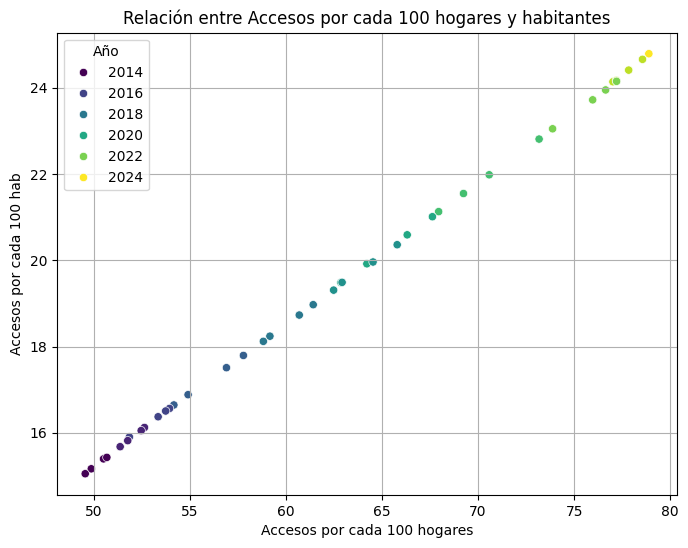

In [354]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Accesos por cada 100 hogares', y='Accesos por cada 100 hab', data=df_penetracion_totales, hue='A√±o', palette='viridis')

# Configuraci√≥n de etiquetas y t√≠tulo
plt.title('Relaci√≥n entre Accesos por cada 100 hogares y habitantes')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Accesos por cada 100 hab')
plt.grid(True)
plt.show()


#### Se puede ver en el grafico de lineas como evolucionan los accesos cada 100 habitantes como asi tambien los accesos cada 100 hogares, esto acompa√±ado del grafico de dispersion se puede decir que hay una relacion lineal.
#### En el grafico de barras podemos ver la penetracion por trimestre en todos los a√±os.

---

### Analisis de la hoja Accesos Por Tecnolog√≠a

In [418]:
# Pasamos la hoja a un Data Frame
df_accesos_por_tecnologia = df_internet.parse('Accesos Por Tecnolog√≠a')
df_accesos_por_tecnologia.head()

A√±o Trimestre        Provincia      ADSL  Cablemodem  Fibra √≥ptica  \
0  2024.0         1     Buenos Aires  203297.0   2790663.0     1799013.0   
1  2024.0         1  Capital Federal   70108.0   1177475.0      203756.0   
2  2024.0         1        Catamarca    5901.0     11025.0       56542.0   
3  2024.0         1            Chaco   11343.0     58929.0       64463.0   
4  2024.0         1           Chubut   26306.0     77217.0       26356.0   

   Wireless     Otros      Total  
0  150290.0  101294.0  5044557.0  
1    4493.0   48879.0  1504711.0  
2    1384.0      81.0    74933.0  
3    8404.0   12404.0   155543.0  
4   30867.0    9930.0   170676.0

In [419]:
# Valores nulos
df_accesos_por_tecnologia.isna().sum()

A√±o             2
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra √≥ptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [420]:
# Valores ceros
(df_accesos_por_tecnologia == 0).sum()

A√±o              0
Trimestre        0
Provincia        0
ADSL             0
Cablemodem      14
Fibra √≥ptica     9
Wireless        38
Otros            0
Total            0
dtype: int64

In [421]:
# Valores duplicados
df_accesos_por_tecnologia.duplicated().sum()

np.int64(0)

In [422]:
df_accesos_por_tecnologia.columns

Index(['A√±o', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra √≥ptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

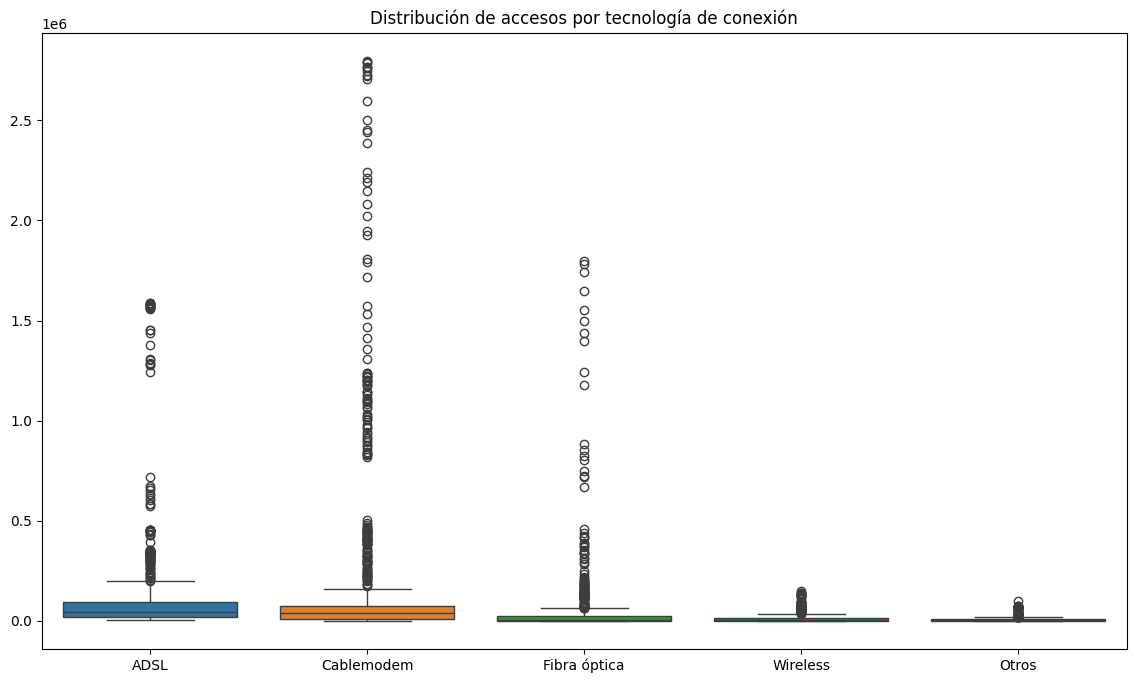

In [423]:
# Configuraci√≥n de la figura
plt.figure(figsize=(14, 8))

# Crear un boxplot para cada tecnolog√≠a
sns.boxplot(data=df_accesos_por_tecnologia[['ADSL', 'Cablemodem', 'Fibra √≥ptica', 'Wireless', 'Otros']])

# T√≠tulo del gr√°fico
plt.title('Distribuci√≥n de accesos por tecnolog√≠a de conexi√≥n')

# Mostrar el gr√°fico
plt.show()


### Analisis de la hoja Velocidad % por prov

In [424]:
df_velocidad_por_provincia = df_internet.parse('Velocidad % por prov')
df_velocidad_por_provincia.head()

A√±o  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          1     Buenos Aires                  159.13
1  2024          1  Capital Federal                  229.94
2  2024          1        Catamarca                   91.45
3  2024          1            Chaco                  107.51
4  2024          1           Chubut                   20.50

In [425]:
# Valores nulos
df_velocidad_por_provincia.isna().sum()

A√±o                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [426]:
# Valores ceros
(df_velocidad_por_provincia == 0).sum()

A√±o                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [427]:
# Valores duplicados
df_velocidad_por_provincia.duplicated().sum()

np.int64(0)

In [428]:
df_velocidad_por_provincia.columns

Index(['A√±o', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')

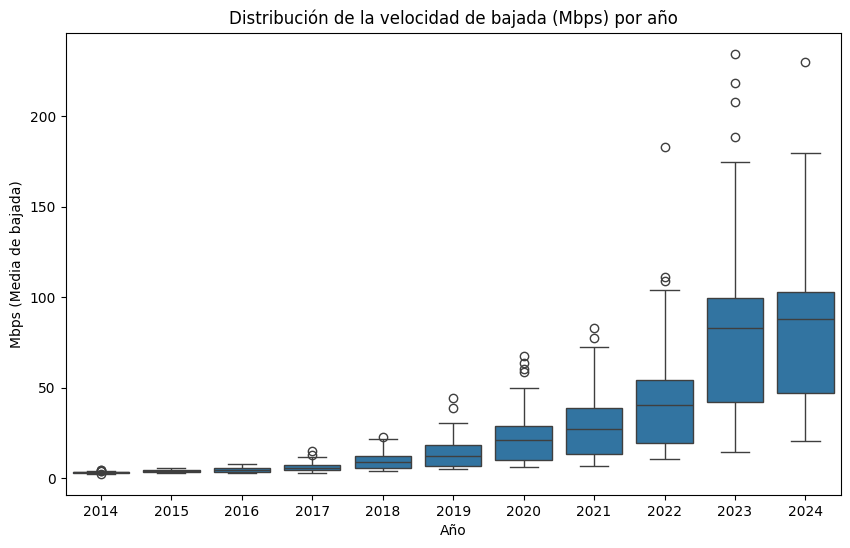

In [429]:
# Configuraci√≥n de la figura
plt.figure(figsize=(10, 6))

# Crear boxplot de la velocidad de bajada (Mbps) por a√±o
sns.boxplot(x='A√±o', y='Mbps (Media de bajada)', data=df_velocidad_por_provincia)

# T√≠tulo del gr√°fico
plt.title('Distribuci√≥n de la velocidad de bajada (Mbps) por a√±o')

# Mostrar el gr√°fico
plt.show()


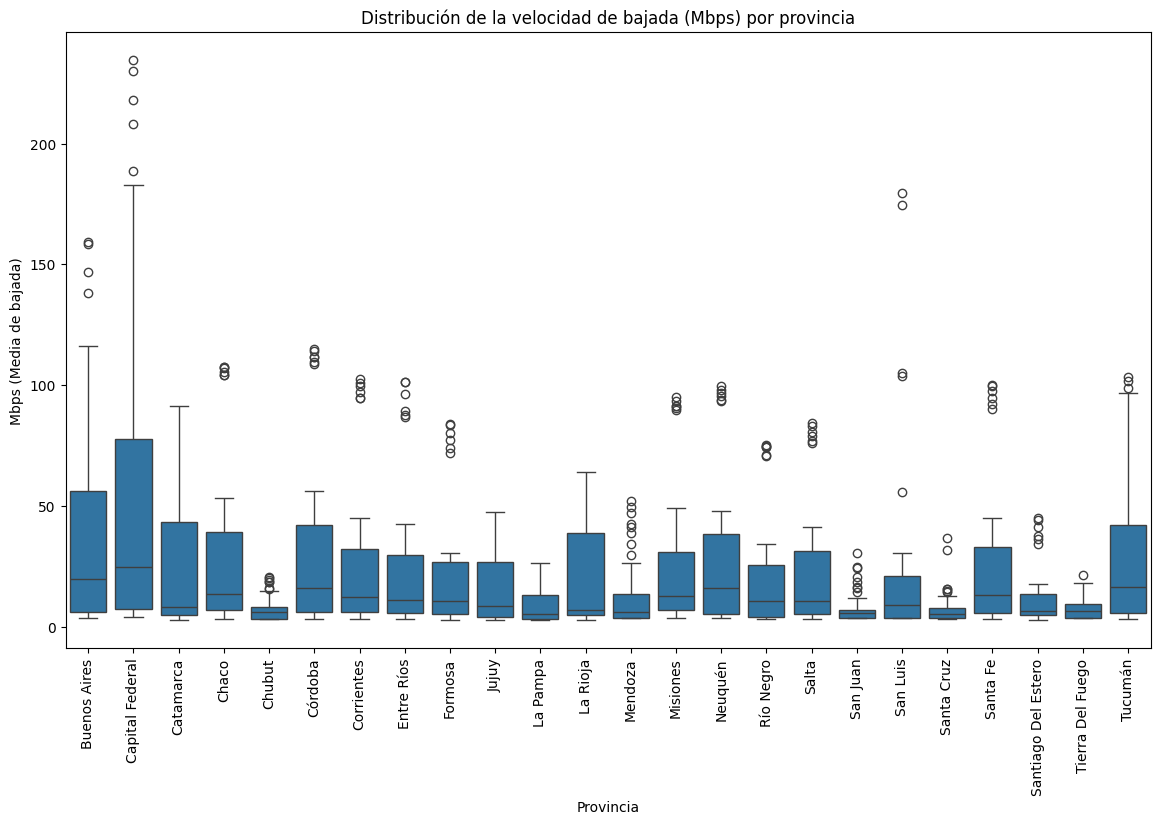

In [430]:
# Configuraci√≥n de la figura
plt.figure(figsize=(14, 8))

# Crear boxplot de la velocidad de bajada (Mbps) por provincia
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df_velocidad_por_provincia)

# Rotar etiquetas del eje X para mayor claridad
plt.xticks(rotation=90)

# T√≠tulo del gr√°fico
plt.title('Distribuci√≥n de la velocidad de bajada (Mbps) por provincia')

# Mostrar el gr√°fico
plt.show()


----

### Algunas graficas y conclusiones

Vamos a ver en el primer grafico como evolucionan los ingresos en pesos por los servicios de internet a traves de los a√±os.
Se puede notar como aumentan considerablemente a partir del 2020, todo impulsado por la pandemia.
Si bien ya venian en crecimiento, a partir de esa fecha es notable la suba de la curva.

### Grafico de ingresos por a√±os

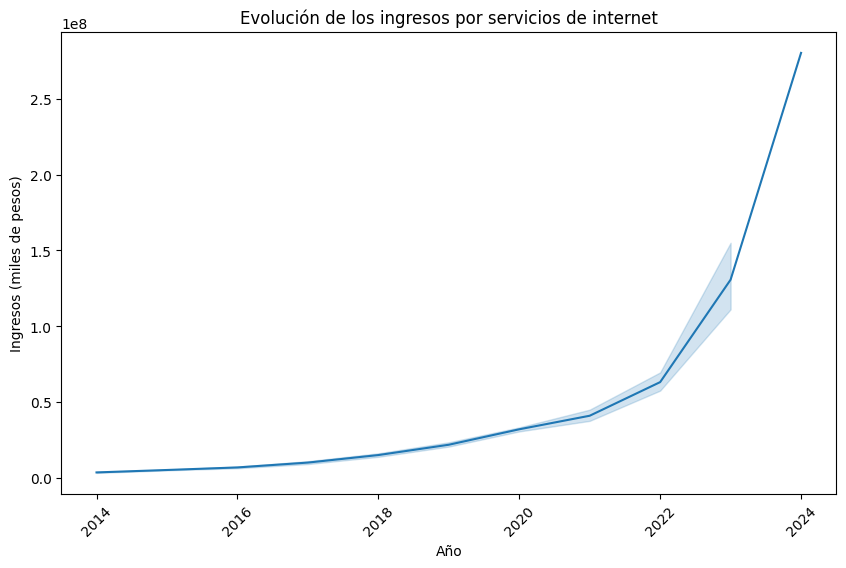

In [431]:
# Gr√°fico de la evoluci√≥n de los ingresos
plt.figure(figsize=(10, 6))
sns.lineplot(x='A√±o', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Evoluci√≥n de los ingresos por servicios de internet')
plt.xlabel('A√±o')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

### Grafico de accesos por tecnologia

In [368]:
df_accesos_por_tecnologia.columns


Index(['A√±o', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra √≥ptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

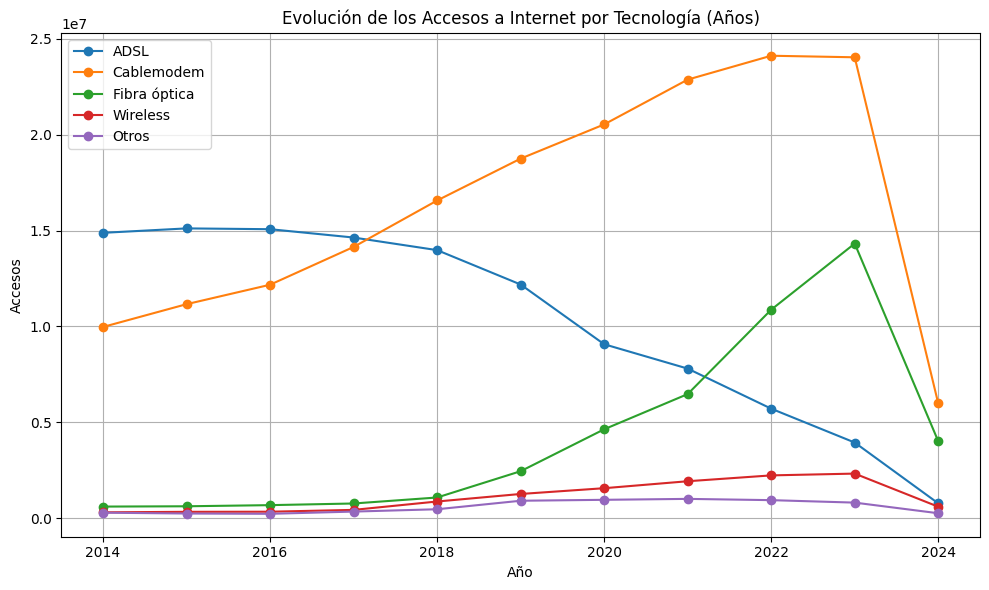

In [370]:
# Agrupar el dataframe por 'A√±o' y sumar los accesos para cada tecnolog√≠a
df_agrupado = df_accesos_por_tecnologia.groupby('A√±o').sum()

# Graficar la evoluci√≥n de las tecnolog√≠as
plt.figure(figsize=(10, 6))

plt.plot(df_agrupado.index, df_agrupado['ADSL'], label='ADSL', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Cablemodem'], label='Cablemodem', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Fibra √≥ptica'], label='Fibra √≥ptica', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Wireless'], label='Wireless', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Otros'], label='Otros', marker='o')

# Configuraci√≥n de la gr√°fica
plt.xlabel('A√±o')
plt.ylabel('Accesos')
plt.title('Evoluci√≥n de los Accesos a Internet por Tecnolog√≠a (A√±os)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


Gr√°fico de l√≠neas que muestra la evoluci√≥n de los accesos a internet por diferentes tecnolog√≠as a lo largo de los a√±os. Cada l√≠nea representa una tecnolog√≠a de acceso a internet, como ADSL, Cablemodem, Fibra √≥ptica, Wireless y otros tipos de acceso.

Aqui podemos ver algunas tendencias de crecimiento o decrecimiento de todas las tecnologias.

A simple vista y en concordancia con los avances tecnologicos y mejoras en las infraestructuras las tecnologias que crecen son Cable Modem y Fibra Optica.

In [432]:
df_accesos_por_velocidad.columns

Index(['A√±o', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

### Evolucion de las velocidades a traves de los a√±os

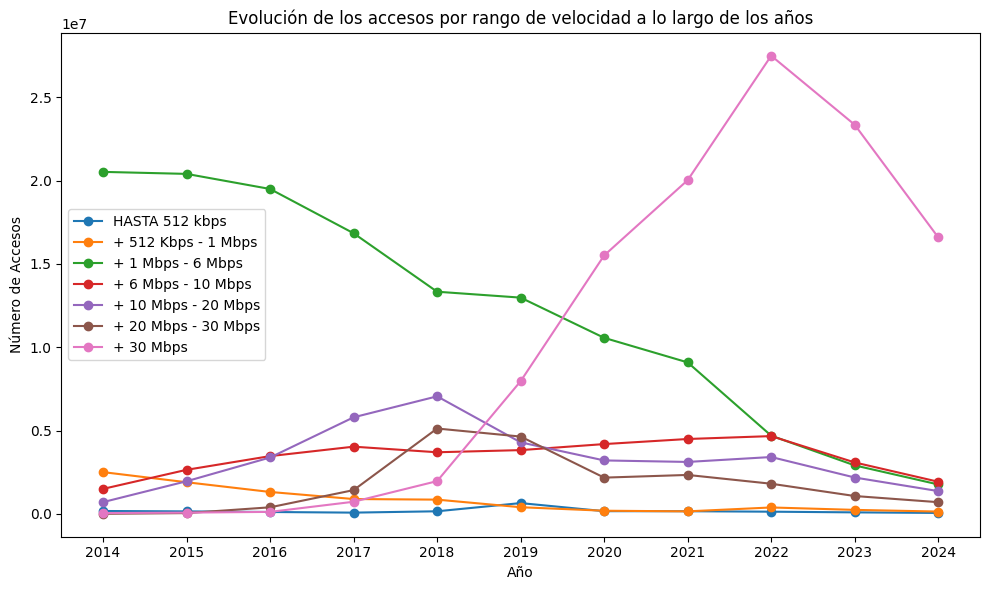

In [433]:
# Agrupar el dataframe por 'A√±o' y sumar los accesos para cada rango de velocidad
df_agrupado = df_accesos_por_velocidad.groupby('A√±o').sum()

# Configurar el tama√±o de la figura
plt.figure(figsize=(10, 6))

# Graficar la evoluci√≥n de los accesos para cada rango de velocidad
plt.plot(df_agrupado.index, df_agrupado['HASTA 512 kbps'], label='HASTA 512 kbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 30 Mbps'], label='+ 30 Mbps', marker='o')

# A√±adir t√≠tulo y etiquetas
plt.title('Evoluci√≥n de los accesos por rango de velocidad a lo largo de los a√±os')
plt.xlabel('A√±o')
plt.ylabel('N√∫mero de Accesos')
plt.xticks(df_agrupado.index)  # Asegurarse de que los a√±os est√©n como ticks en el eje x

# A√±adir leyenda
plt.legend()

# Mostrar gr√°fico
plt.tight_layout()
plt.show()


Este gr√°fico de l√≠neas muestra la evoluci√≥n de los accesos a internet por diferentes rangos de velocidad a lo largo de los a√±os. Cada l√≠nea representa un rango de velocidad distinto, desde conexiones muy lentas hasta las m√°s r√°pidas (m√°s de 30 Mbps). El gr√°fico ofrece una visi√≥n clara del comportamiento de los usuarios de internet respecto a la adopci√≥n de diferentes velocidades con el paso del tiempo.

Se observan tendencias de adoptar cada vez velocidades mas elevadas, entre 20 Mbps, y mas de 30 Mbps.

## KPI 1

1. KPI 1: Crecimiento de los accesos a velocidad +30 Mbps

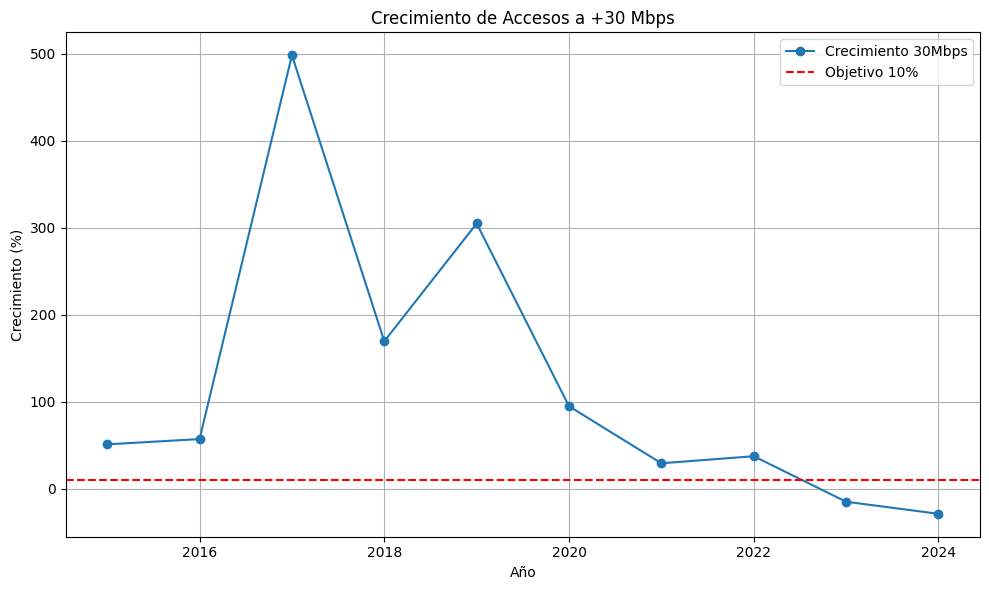

In [434]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los datos por a√±o
df_agrupado = df_accesos_por_velocidad.groupby('A√±o').sum()

# Calcular KPI Crecimiento 30 Mbps
df_agrupado['Crecimiento_30Mbps'] = (df_agrupado['+ 30 Mbps'] - df_agrupado['+ 30 Mbps'].shift(1)) / df_agrupado['+ 30 Mbps'].shift(1) * 100

# Visualizaci√≥n del KPI
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['Crecimiento_30Mbps'], marker='o', label='Crecimiento 30Mbps')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('Crecimiento de Accesos a +30 Mbps')
plt.xlabel('A√±o')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. KPI 2: Penetraci√≥n de internet por hogar
Objetivo: Aumentar la penetraci√≥n del acceso a internet en un 2% respecto al trimestre anterior.

In [452]:
df_accesos_por_tecnologia= df_accesos_por_tecnologia.isna().sum()


In [456]:
# Asegurarse de que 'Accesos_Fibra' es una serie de pandas
df_accesos_por_tecnologia['Accesos_Fibra'] = df_accesos_por_tecnologia['Fibra √≥ptica']

# Ordenar los datos por 'A√±o' para aplicar shift de forma correcta
df_accesos_por_tecnologia = df_accesos_por_tecnologia.sort_values(by=['A√±o'])

# Calcular el KPI de crecimiento de accesos para Fibra √ìptica
df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'] = (
    (df_accesos_por_tecnologia['Accesos_Fibra'] - df_accesos_por_tecnologia['Accesos_Fibra'].shift(1)) /
    df_accesos_por_tecnologia['Accesos_Fibra'].shift(1)
) * 100

# Verificar que la columna de accesos no tiene ceros para evitar divisiones por cero
df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'] = df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'].replace([np.inf, -np.inf], np.nan)

# Visualizaci√≥n del KPI para Fibra √ìptica
plt.figure(figsize=(10, 6))
plt.plot(df_accesos_por_tecnologia['A√±o'], df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'], marker='o', label='Crecimiento Fibra √ìptica')
plt.axhline(y=5, color='r', linestyle='--', label='Objetivo 5%')
plt.title('Crecimiento de Accesos de Fibra √ìptica')
plt.xlabel('A√±o')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






TypeError: Series.sort_values() got an unexpected keyword argument 'by'

3. KPI 3: Incremento total de accesos a internet
Objetivo: Medir el incremento total de accesos a internet respecto al a√±o anterior.

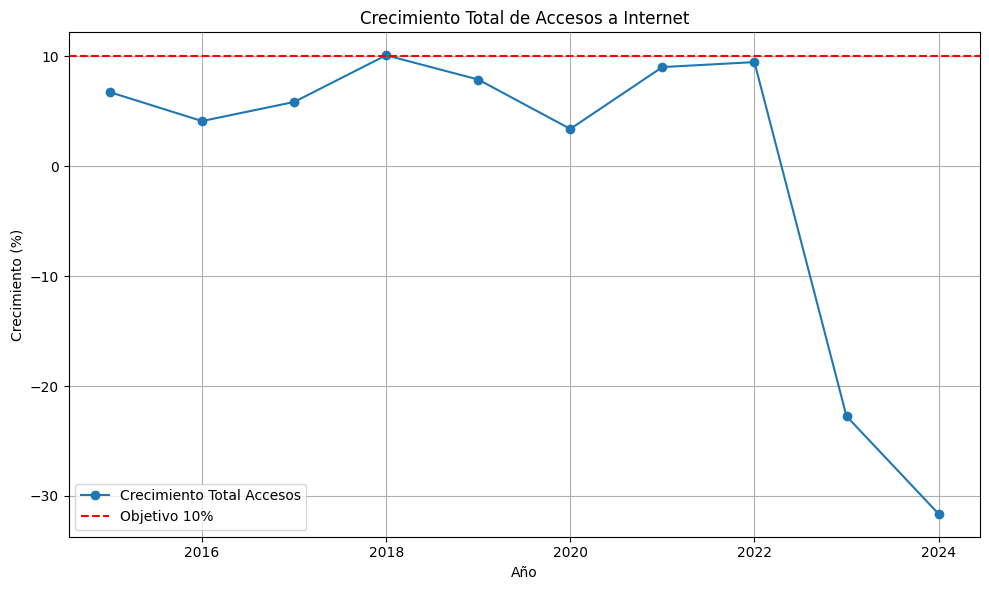

In [436]:
# Calcular KPI Incremento Total de Accesos
df_agrupado['Crecimiento_Total_Accesos'] = (df_agrupado['Total'] - df_agrupado['Total'].shift(1)) / df_agrupado['Total'].shift(1) * 100

# Visualizaci√≥n del KPI
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['Crecimiento_Total_Accesos'], marker='o', label='Crecimiento Total Accesos')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('Crecimiento Total de Accesos a Internet')
plt.xlabel('A√±o')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [383]:
import pandas as pd

# Copia del DataFrame para trabajar
df_kpi = df_penetracion_totales.copy()

# Calcular "Acceso Actual"
df_kpi['Acceso Actual'] = df_kpi['Accesos por cada 100 hogares']

# Calcular "Nuevo Acceso" (se proyecta un aumento del 2%)
df_kpi['Nuevo Acceso'] = df_kpi['Acceso Actual'] * 1.02

# Calcular KPI (porcentaje de crecimiento esperado)
df_kpi['KPI_Crecimiento'] = ((df_kpi['Nuevo Acceso'] - df_kpi['Acceso Actual']) / df_kpi['Acceso Actual']) * 100

# Mostrar los primeros resultados para verificar
print(df_kpi[['A√±o', 'Trimestre', 'Acceso Actual', 'Nuevo Acceso', 'KPI_Crecimiento']].head())


    A√±o  Trimestre  Acceso Actual  Nuevo Acceso  KPI_Crecimiento
0  2024          1          78.89       80.4678              2.0
1  2023          4          78.56       80.1312              2.0
2  2023          3          77.84       79.3968              2.0
3  2023          2          77.02       78.5604              2.0
4  2023          1          77.20       78.7440              2.0


/tmp/ipykernel_486566/1608929291.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='A√±o', y='KPI_Crecimiento', data=df_ultimo_trimestre, palette='coolwarm')


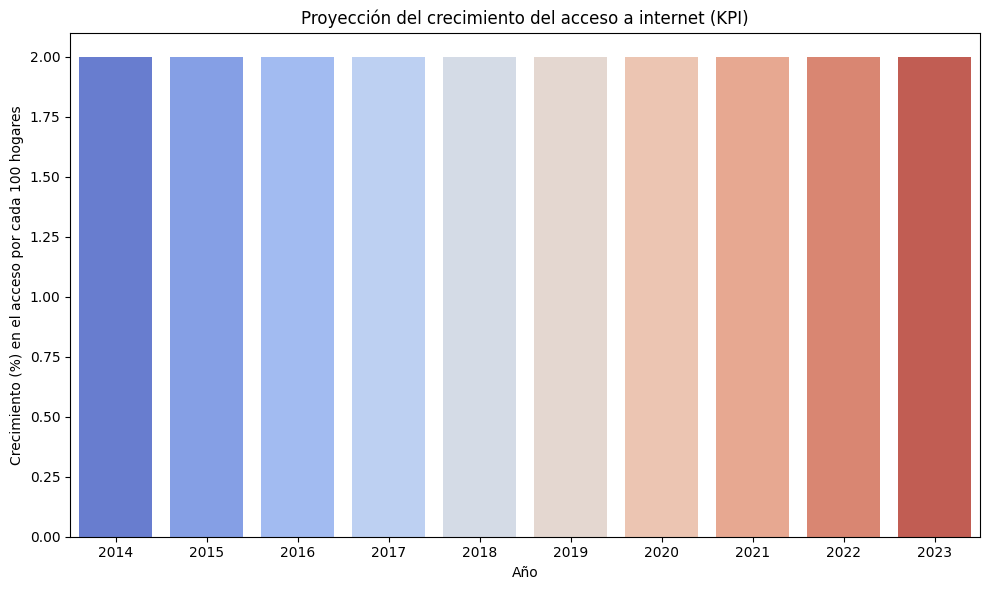

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo el √∫ltimo trimestre de cada a√±o para graficar el KPI
df_ultimo_trimestre = df_kpi[df_kpi['Trimestre'] == df_kpi['Trimestre'].max()]

# Configurar el tama√±o de la figura
plt.figure(figsize=(10, 6))

# Graficar el KPI (Crecimiento porcentual proyectado)
sns.barplot(x='A√±o', y='KPI_Crecimiento', data=df_ultimo_trimestre, palette='coolwarm')

# A√±adir etiquetas y t√≠tulo
plt.title('Proyecci√≥n del crecimiento del acceso a internet (KPI)')
plt.xlabel('A√±o')
plt.ylabel('Crecimiento (%) en el acceso por cada 100 hogares')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


Interpretaci√≥n del Gr√°fico:
El gr√°fico muestra la evoluci√≥n de los accesos a internet por distintas tecnolog√≠as (ADSL, Cablemodem, Fibra √ìptica, Wireless y Otros) a lo largo de los a√±os.

ADSL: Vemos que esta tecnolog√≠a, que fue predominante durante los primeros a√±os del gr√°fico, ha ido disminuyendo de forma progresiva. Esto es coherente con la transici√≥n tecnol√≥gica que ha ocurrido hacia soluciones m√°s r√°pidas y eficientes como la fibra √≥ptica.

Cablemodem: A lo largo del tiempo, el n√∫mero de accesos a internet mediante Cablemodem se ha mantenido relativamente estable. Aunque esta tecnolog√≠a ha tenido una ligera disminuci√≥n en los √∫ltimos a√±os, sigue siendo una opci√≥n significativa para muchos usuarios.

Fibra √ìptica: Esta es la tecnolog√≠a que muestra el mayor crecimiento. A lo largo de los a√±os, podemos observar un incremento sostenido en el n√∫mero de accesos, lo que sugiere una migraci√≥n hacia soluciones de mayor velocidad y estabilidad en las conexiones.

Wireless: Los accesos mediante tecnolog√≠as inal√°mbricas han mostrado un comportamiento irregular, con subidas y bajadas a lo largo del tiempo, pero en general, parece que han logrado mantener una presencia significativa en el mercado, aunque no con el mismo crecimiento que la fibra √≥ptica.

Otros: Esta categor√≠a agrupa accesos a internet mediante tecnolog√≠as menos comunes. Aunque no muestran un crecimiento notable, siguen representando una porci√≥n del mercado.

Conclusiones:
Migraci√≥n a Fibra √ìptica: El gr√°fico refleja una clara tendencia de migraci√≥n hacia fibra √≥ptica, que se ha convertido en la tecnolog√≠a dominante en los √∫ltimos a√±os. Esta tecnolog√≠a ofrece velocidades superiores y mejor estabilidad, lo que la ha hecho preferida tanto para los hogares como para las empresas.

Disminuci√≥n del ADSL: La ca√≠da de los accesos a internet mediante ADSL es evidente, lo que indica que esta tecnolog√≠a se est√° quedando obsoleta y siendo reemplazada por alternativas m√°s modernas.

Cablemodem como opci√≥n estable: A pesar del auge de la fibra √≥ptica, el Cablemodem ha logrado mantenerse como una opci√≥n viable para muchos usuarios. Sin embargo, su crecimiento ha sido mucho m√°s moderado en comparaci√≥n con la fibra.

Wireless y su papel: Las tecnolog√≠as inal√°mbricas han tenido fluctuaciones a lo largo de los a√±os, lo que podr√≠a sugerir que est√°n m√°s influenciadas por factores geogr√°ficos o situaciones puntuales (como en √°reas rurales o donde no llegan otras tecnolog√≠as).

Diversificaci√≥n en "Otros": Aunque los accesos clasificados en "Otros" no son predominantes, siguen presentes. Esto podr√≠a estar relacionado con el uso de tecnolog√≠as espec√≠ficas en determinadas regiones o situaciones particulares donde otras opciones no son viables.

En resumen, el gr√°fico refleja la evoluci√≥n natural del mercado de internet en favor de tecnolog√≠as m√°s avanzadas, con un claro crecimiento de la fibra √≥ptica y una ca√≠da progresiva de tecnolog√≠as m√°s antiguas como el ADSL.

### Grafico penetracion por poblacion

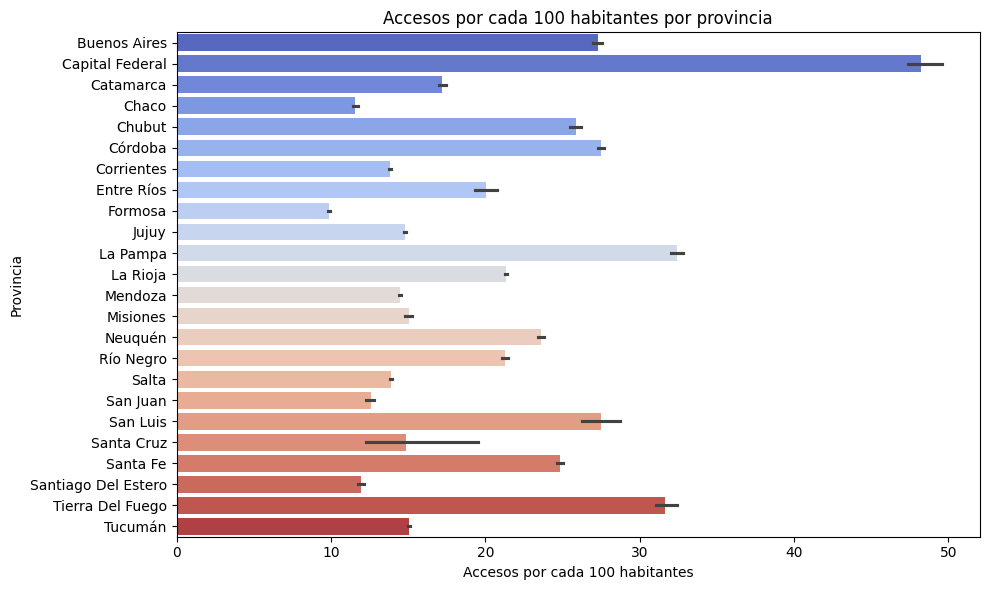

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar con hue (opci√≥n recomendada)
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=df_filtrado, hue='Provincia', palette='coolwarm', legend=False)

# T√≠tulos y etiquetas
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()



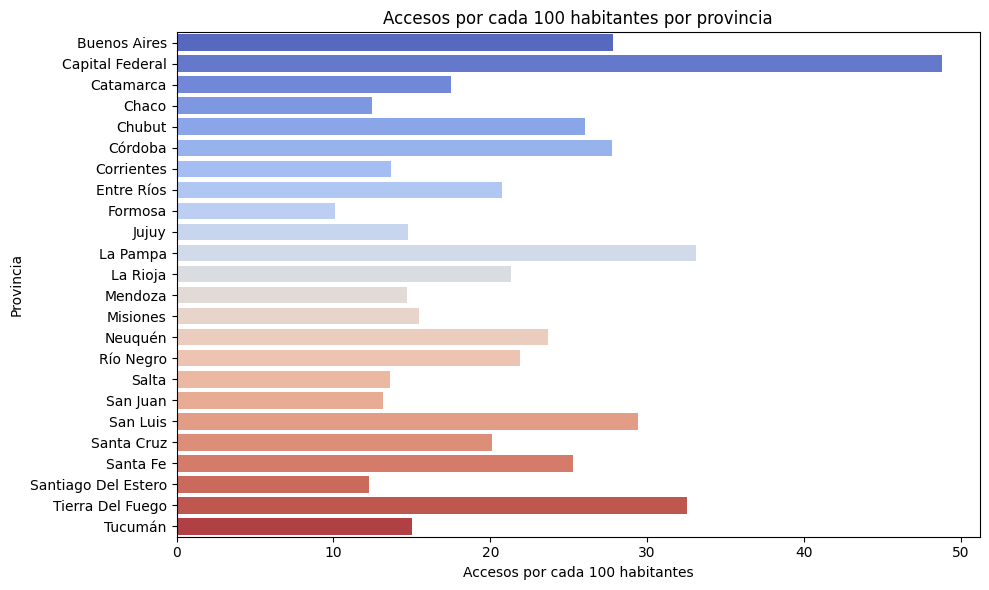

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar usando 'hue' para que cada provincia tenga un color distinto
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=df_filtrado, hue='Provincia', palette='coolwarm', dodge=False)

# T√≠tulos y etiquetas
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


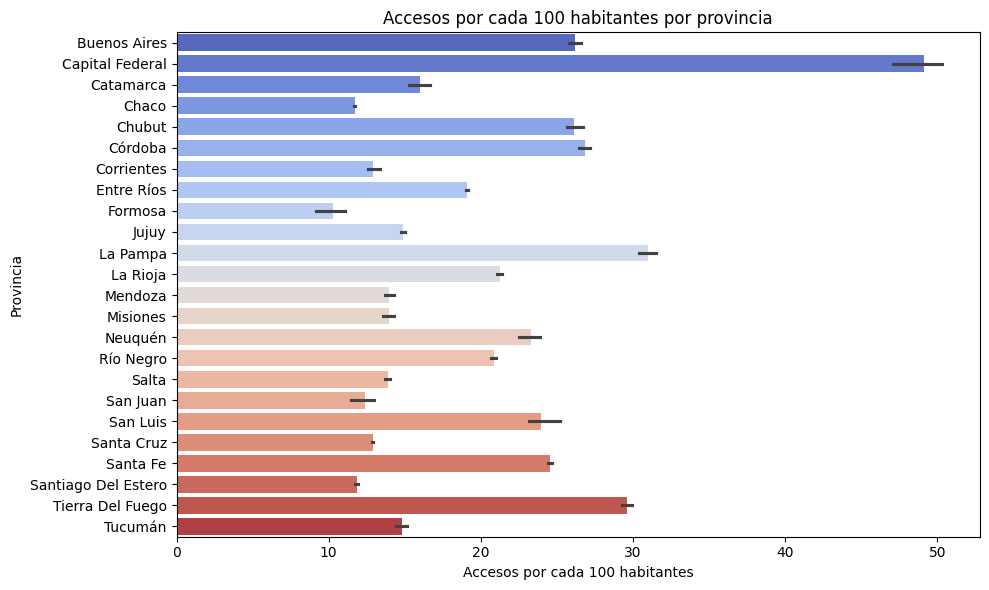

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar hue para asignar colores por provincia
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=df_filtrado, hue='Provincia', palette='coolwarm', dodge=False)

# T√≠tulos y etiquetas
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


Este gr√°fico es un gr√°fico de barras que muestra la penetraci√≥n de internet por provincia en el a√±o 2022, donde la penetraci√≥n se mide en t√©rminos de accesos por cada 100 hogares. Cada barra representa una provincia, y la longitud de la barra refleja el nivel de penetraci√≥n de internet en esa provincia. Las provincias est√°n ordenadas en el eje y, y el n√∫mero de accesos est√° en el eje x.

An√°lisis de la informaci√≥n:
Comparaci√≥n de Provincias: Puedes comparar visualmente qu√© provincias tienen una mayor o menor penetraci√≥n de internet. Las provincias con barras m√°s largas indican una penetraci√≥n m√°s alta, es decir, m√°s hogares con acceso a internet por cada 100.

Disparidades regionales: Si observas grandes diferencias en la longitud de las barras entre provincias, esto podr√≠a indicar disparidades significativas en el acceso a internet entre diferentes regiones del pa√≠s. Algunas provincias pueden tener acceso a internet m√°s extendido que otras.

Provincias con menor penetraci√≥n: Las provincias con las barras m√°s cortas est√°n experimentando una menor penetraci√≥n de internet, lo que podr√≠a reflejar problemas de infraestructura, falta de inversi√≥n o barreras geogr√°ficas.

Provincias con mayor penetraci√≥n: Las provincias con las barras m√°s largas indican un alto nivel de acceso a internet por hogar. Esto podr√≠a reflejar que en esas √°reas el acceso a internet est√° m√°s desarrollado, con una mayor disponibilidad de servicios de telecomunicaciones.

An√°lisis y Conclusiones:
Provincias l√≠deres y rezagadas: Dependiendo de los datos, se pueden identificar las provincias que tienen una buena infraestructura de internet, con una penetraci√≥n alta (barras m√°s largas), y aquellas que est√°n rezagadas (barras m√°s cortas).

Pol√≠tica y desarrollo: Si existen disparidades notables, los resultados podr√≠an indicar la necesidad de intervenciones pol√≠ticas o econ√≥micas para mejorar el acceso a internet en las provincias con menor penetraci√≥n.

Tendencias para el futuro: Si este an√°lisis se compara con datos de a√±os anteriores, podr√≠as determinar si las provincias con menor penetraci√≥n est√°n mejorando con el tiempo, si las diferencias se est√°n ampliando o si est√°n estancadas.

Recomendaciones para acciones:
Mejora de infraestructuras: Las provincias con baja penetraci√≥n podr√≠an beneficiarse de mayores inversiones en infraestructura de telecomunicaciones, especialmente en √°reas rurales.

Pol√≠ticas de inclusi√≥n digital: Es posible que se necesiten pol√≠ticas de inclusi√≥n digital para reducir las desigualdades en el acceso a internet entre provincias.

En resumen, este gr√°fico te permite visualizar las desigualdades geogr√°ficas en el acceso a internet y determinar en qu√© √°reas podr√≠a ser necesario intervenir para aumentar la conectividad.

## Probando KPI

Para implementar el KPI propuesto, es necesario calcular el porcentaje de aumento de acceso a internet por cada 100 hogares en el pr√≥ximo trimestre, a partir del acceso actual en cada provincia. A continuaci√≥n te explico c√≥mo hacerlo y c√≥mo graficar este KPI. Tambi√©n te proporcionar√© un ejemplo de dos KPIs adicionales relevantes para este an√°lisis.

KPI Propuesto: Aumento del 2% en el acceso a internet por cada 100 hogares para el pr√≥ximo trimestre
1. C√°lculo del KPI
El KPI se calcula utilizando la siguiente f√≥rmula:

ùêæ
ùëÉ
ùêº
=
(
ùëÅ
ùë¢
ùëí
ùë£
ùëú
¬†
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
‚àí
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
¬†
ùê¥
ùëê
ùë°
ùë¢
ùëé
ùëô
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
¬†
ùê¥
ùëê
ùë°
ùë¢
ùëé
ùëô
)
‚àó
100
KPI=( 
Acceso¬†Actual
Nuevo¬†Acceso‚àíAcceso¬†Actual
‚Äã
 )‚àó100
Donde:

"Nuevo acceso" es el n√∫mero de hogares proyectado para el siguiente trimestre (un aumento del 2% sobre el acceso actual).
"Acceso actual" es el n√∫mero de hogares con acceso en el trimestre actual.


In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_penetracion_hogares contiene los accesos por cada 100 hogares
# Crear una nueva columna con el acceso proyectado para el pr√≥ximo trimestre (aumento del 2%)
df_penetracion_poblacion['Nuevo Acceso'] = df_penetracion_poblacion['Accesos por cada 100 hab'] * 1.02

# Calcular el KPI (aumento en el acceso por cada 100 hogares)
df_penetracion_poblacion['KPI'] = ((df_penetracion_poblacion['Nuevo Acceso'] - df_penetracion_poblacion['Accesos por cada 100 hab']) 
                                   / df_penetracion_poblacion['Accesos por cada 100 hab']) * 100

# Mostrar los primeros resultados
df_penetracion_poblacion[['Provincia', 'A√±o', 'Trimestre', 'Accesos por cada 100 hab', 'Nuevo Acceso', 'KPI']].head()


Provincia   A√±o  Trimestre  Accesos por cada 100 hab  Nuevo Acceso  \
0     Buenos Aires  2024          1                     27.80       28.3560   
1  Capital Federal  2024          1                     48.78       49.7556   
2        Catamarca  2024          1                     17.50       17.8500   
3            Chaco  2024          1                     12.48       12.7296   
4           Chubut  2024          1                     26.02       26.5404   

   KPI  
0  2.0  
1  2.0  
2  2.0  
3  2.0  
4  2.0

2. Graficar el KPI por provincia
Un gr√°fico de barras puede ser √∫til para visualizar el KPI por provincia.

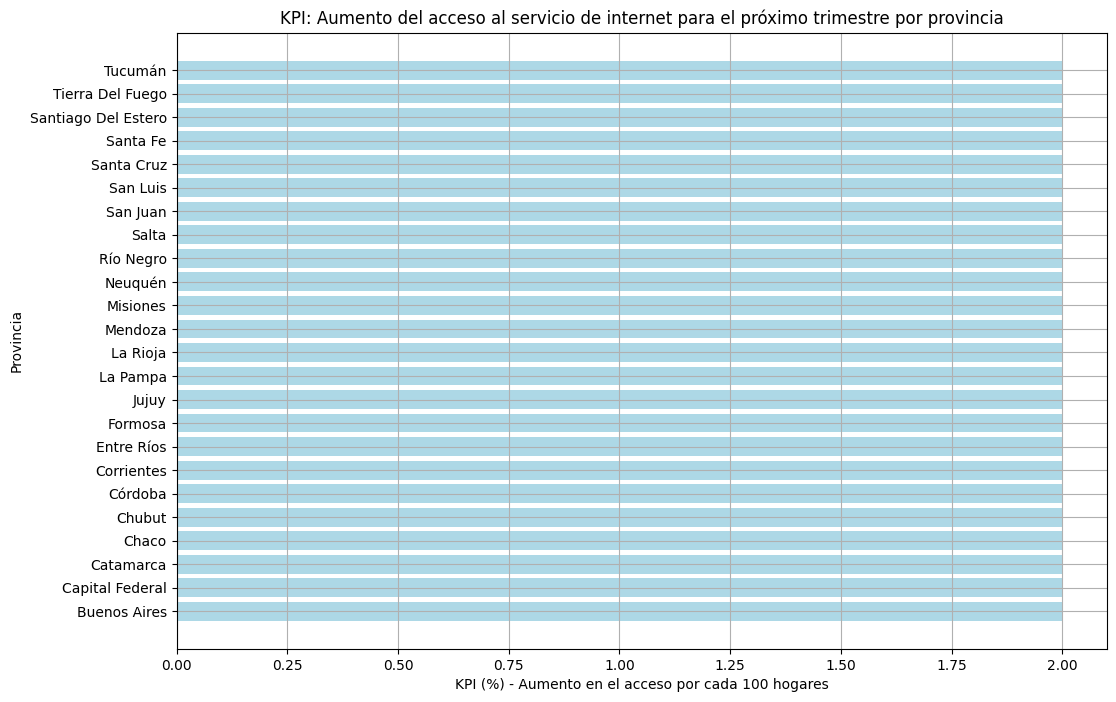

In [226]:
plt.figure(figsize=(12, 8))
# Graficar el KPI por provincia
df_filtrado = df_penetracion_poblacion[df_penetracion_poblacion['A√±o'] == 2023]
plt.barh(df_filtrado['Provincia'], df_filtrado['KPI'], color='lightblue')

# Etiquetas del gr√°fico
plt.title('KPI: Aumento del acceso al servicio de internet para el pr√≥ximo trimestre por provincia')
plt.xlabel('KPI (%) - Aumento en el acceso por cada 100 hogares')
plt.ylabel('Provincia')
plt.grid(True)
plt.show()


KPI Adicional 1: Variaci√≥n trimestral de los accesos
Este KPI mide la variaci√≥n del acceso a internet en cada trimestre respecto al trimestre anterior.

ùêæ
ùëÉ
ùêº
ùë°
ùëü
ùëñ
ùëö
ùëí
ùë†
ùë°
ùëü
ùëé
ùëô
=
(
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
ùë°
ùëü
ùëñ
ùëö
ùëí
ùë†
ùë°
ùëü
ùëí
¬†
ùëé
ùëê
ùë°
ùë¢
ùëé
ùëô
‚àí
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
ùë°
ùëü
ùëñ
ùëö
ùëí
ùë†
ùë°
ùëü
ùëí
¬†
ùëé
ùëõ
ùë°
ùëí
ùëü
ùëñ
ùëú
ùëü
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
ùë°
ùëü
ùëñ
ùëö
ùëí
ùë†
ùë°
ùëü
ùëí
¬†
ùëé
ùëõ
ùë°
ùëí
ùëü
ùëñ
ùëú
ùëü
)
‚àó
100
KPI 
trimestral
‚Äã
 =( 
Acceso 
trimestre¬†anterior
‚Äã
 
Acceso 
trimestre¬†actual
‚Äã
 ‚àíAcceso 
trimestre¬†anterior
‚Äã
 
‚Äã
 )‚àó100
C√≥digo para el KPI trimestral:

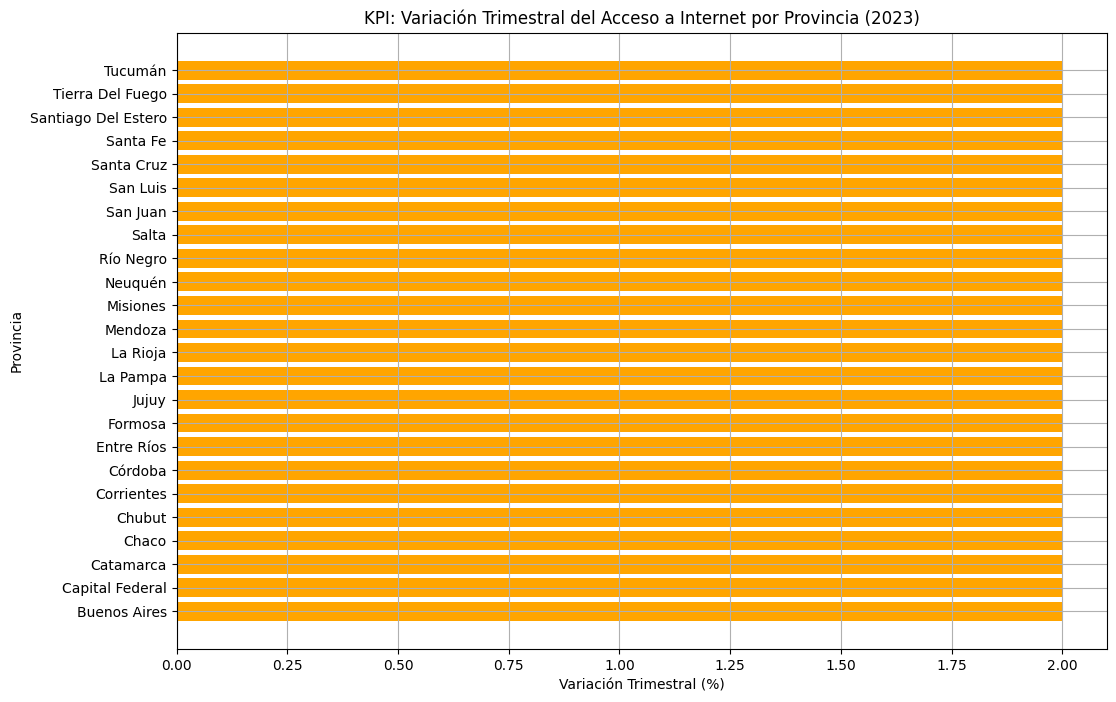

In [230]:
# Ordenar por A√±o y Trimestre
df_penetracion_poblacion = df_penetracion_poblacion.sort_values(by=['Provincia', 'A√±o', 'Trimestre'])

# Calcular el KPI de variaci√≥n trimestral
df_penetracion_poblacion['KPI'] = df_penetracion_poblacion.groupby('Provincia')['Accesos por cada 100 hab'].pct_change() * 100

# Graficar la variaci√≥n trimestral por provincia
plt.figure(figsize=(12, 8))
plt.barh(df_filtrado['Provincia'], df_filtrado['KPI'], color='orange')

plt.title('KPI: Variaci√≥n Trimestral del Acceso a Internet por Provincia (2023)')
plt.xlabel('Variaci√≥n Trimestral (%)')
plt.ylabel('Provincia')
plt.grid(True)
plt.show()


KPI Adicional 2: Tasa de penetraci√≥n en los hogares
Este KPI mide la tasa de penetraci√≥n en los hogares en un trimestre espec√≠fico, es decir, cu√°ntos hogares por cada 100 tienen acceso a internet en cada provincia.

ùêæ
ùëÉ
ùêº
ùëù
ùëí
ùëõ
ùëí
ùë°
ùëü
ùëé
ùëê
ùëñ
ùëú
Àä
ùëõ
=
(
ùê¥
ùëê
ùëê
ùëí
ùë†
ùëú
ùë†
¬†
ùëù
ùëú
ùëü
¬†
ùëê
ùëé
ùëë
ùëé
¬†
100
¬†
‚Ñé
ùëú
ùëî
ùëé
ùëü
ùëí
ùë†
100
)
‚àó
100
KPI 
penetraci 
o
Àä
 n
‚Äã
 =( 
100
Accesos¬†por¬†cada¬†100¬†hogares
‚Äã
 )‚àó100
C√≥digo para el KPI de penetraci√≥n:

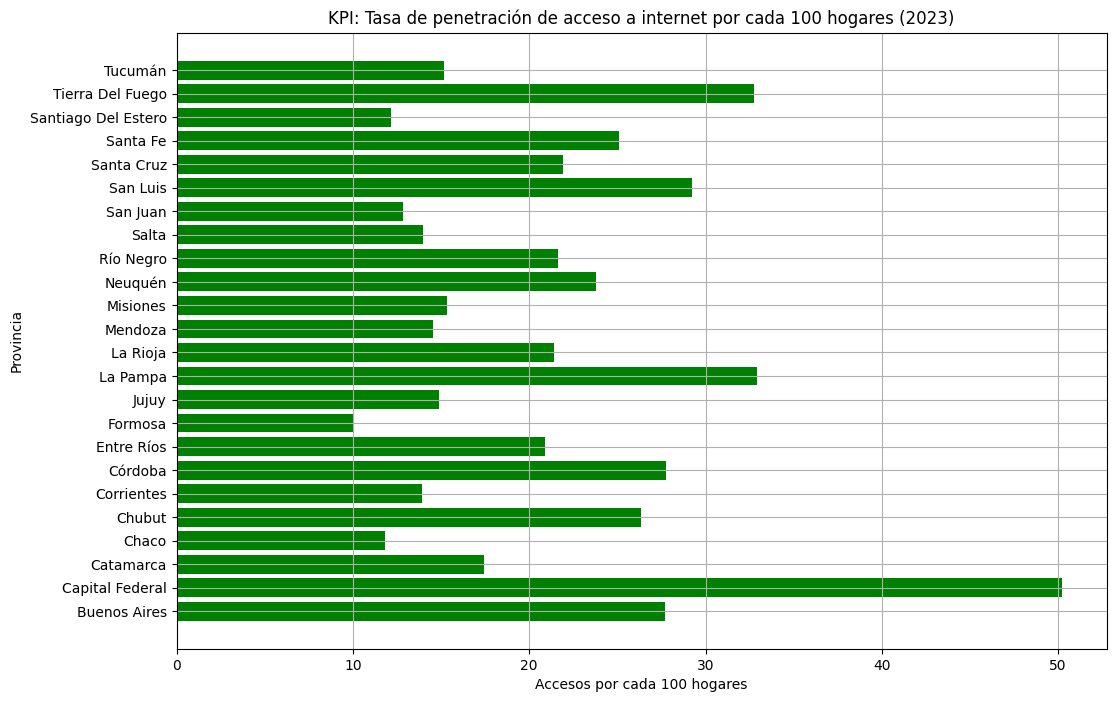

In [231]:
# KPI de tasa de penetraci√≥n en los hogares (es el mismo valor que ya est√° calculado)
plt.figure(figsize=(12, 8))

# Filtramos por un a√±o espec√≠fico
df_filtrado = df_penetracion_poblacion[df_penetracion_poblacion['A√±o'] == 2023]

# Graficar la tasa de penetraci√≥n por provincia
plt.barh(df_filtrado['Provincia'], df_filtrado['Accesos por cada 100 hab'], color='green')

plt.title('KPI: Tasa de penetraci√≥n de acceso a internet por cada 100 hogares (2023)')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.grid(True)
plt.show()


Conclusiones:
KPI propuesto: Te permite monitorear el aumento esperado del 2% en los accesos a internet por provincia para el pr√≥ximo trimestre.
KPI trimestral: Ofrece una visi√≥n clara de las variaciones de accesos entre trimestres.
KPI de penetraci√≥n: Indica cu√°ntos hogares tienen acceso a internet, facilitando el an√°lisis de la penetraci√≥n del servicio en cada provincia.
Estos KPIs pueden proporcionar una visi√≥n completa de c√≥mo ha evolucionado el acceso a internet en Argentina a nivel provincial y c√≥mo se proyecta a futuro.

# Mirar esto despues

In [378]:
import pandas as pd

# Suponiendo que tienes un DataFrame con las columnas ['A√±o', 'Provincia', 'Fibra √≥ptica', 'Cablemodem']
# Filtrar los datos de los a√±os de la pandemia (2020-2022)
df_pandemia = df_accesos_por_tecnologia[df_accesos_por_tecnologia['A√±o'].isin([2020, 2021, 2022])]

# Agrupar por a√±o para obtener los totales por cada tecnolog√≠a
df_totales_pandemia = df_pandemia.groupby('A√±o')[['Fibra √≥ptica', 'Cablemodem']].sum()

# Calcular el porcentaje de crecimiento a√±o a a√±o para Fibra √≥ptica y Cablemodem
df_totales_pandemia['Fibra_Optica_Crecimiento'] = df_totales_pandemia['Fibra √≥ptica'].pct_change() * 100
df_totales_pandemia['Cablemodem_Crecimiento'] = df_totales_pandemia['Cablemodem'].pct_change() * 100

# Mostrar las estad√≠sticas
print(df_totales_pandemia)


        Fibra √≥ptica  Cablemodem  Fibra_Optica_Crecimiento  \
A√±o                                                          
2020.0     4636620.0  20539964.0                       NaN   
2021.0     6473506.0  22877010.0                 39.616919   
2022.0    10874934.0  24122067.0                 67.991410   

        Cablemodem_Crecimiento  
A√±o                             
2020.0                     NaN  
2021.0               11.378043  
2022.0                5.442394  


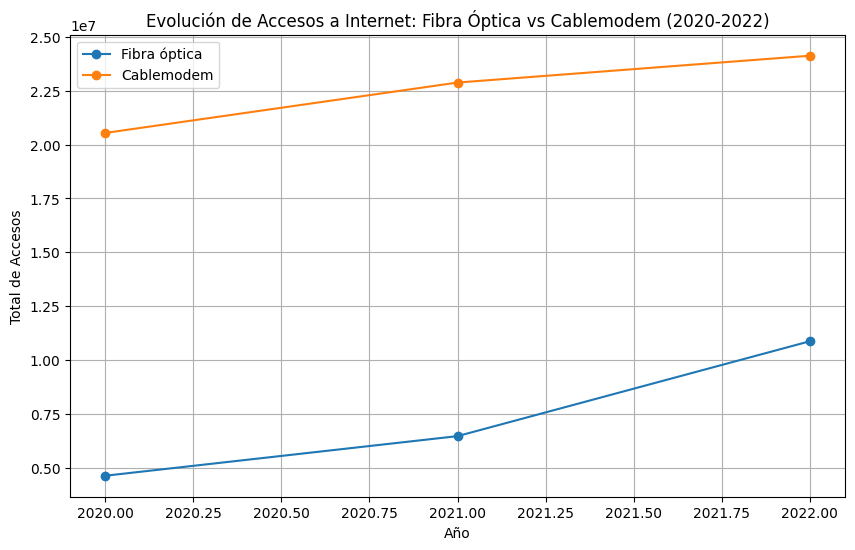

In [379]:
import matplotlib.pyplot as plt

# Gr√°fico de evoluci√≥n
df_totales_pandemia[['Fibra √≥ptica', 'Cablemodem']].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Evoluci√≥n de Accesos a Internet: Fibra √ìptica vs Cablemodem (2020-2022)')
plt.ylabel('Total de Accesos')
plt.xlabel('A√±o')
plt.grid(True)
plt.show()


Posibles conclusiones:
1. Fibra √ìptica: Dependiendo del crecimiento que veas, podr√≠as observar si la adopci√≥n de fibra √≥ptica ha crecido significativamente durante la pandemia, posiblemente debido a la necesidad de mejores conexiones en el hogar.
2. Cablemodem: Tambi√©n podr√≠as observar si el crecimiento de Cablemodem ha sido sostenido o ha disminuido frente a Fibra √ìptica.
Con estos an√°lisis, podr√°s ver c√≥mo ha evolucionado el acceso a internet durante los √∫ltimos a√±os y si hay una transici√≥n clara hacia tecnolog√≠as m√°s r√°pidas como la fibra √≥ptica.